In [1]:
env_name = "envs/GrabbingPointDetector"  # Name of the Unity environment binary to launch
train_mode = True

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from mlagents.envs.environment import UnityEnvironment

In [3]:
env = UnityEnvironment(file_name=env_name)

INFO:mlagents.envs:
'RobotArmAcademy' started successfully!
Unity Academy name: RobotArmAcademy
        Number of Training Brains : 0
        Reset Parameters :
		gravity -> 9.8100004196167
		scale -> 1.0
		mass -> 1.0



In [4]:
env.reset(train_mode=train_mode)

{'RobotArm Behaviour': <mlagents.envs.brain.BrainInfo at 0x11b2176a0>}

In [ ]:
env.agents

In [5]:
default_brain = env.external_brain_names[0]
brain = env.brains[default_brain]

Agent state looks like: 
[]
Agent observations look like:


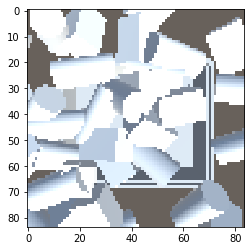

In [6]:
# Reset the environment
env_info = env.reset(train_mode=train_mode)[default_brain]
# Examine the state space for the default brain
print("Agent state looks like: \n{}".format(env_info.vector_observations[0]))

# Examine the observation space for the default brain
for observation in env_info.visual_observations:
    print("Agent observations look like:")
    observation = np.array(observation)
    if observation.shape[3] == 3:
        plt.imshow(observation[0,:,:,:])
    else:
        plt.imshow(observation[0,:,:,0])

In [10]:
for episode in range(10):
    env_info = env.reset(train_mode=train_mode)[default_brain]
    done = False
    episode_rewards = 0
    while not done:
        action_size = brain.vector_action_space_size
        env_info = env.step(np.random.randn(len(env_info.agents), action_size[0]))[default_brain]

        episode_rewards += env_info.rewards[0]
        done = env_info.local_done[0]
    print("Total reward this episode: {}".format(episode_rewards))

KeyboardInterrupt: 